### Import Danych

#### Użyte Biblioteki i ich wersje:
- python: 3.12.7
- pandas: 2.2.3
- TextBlob: 0.18.0.post0
- matplotlib: 3.10.1
- wordcloud: 1.9.3

In [2]:
#zaimportowanie potrzebnych bibliotek
import pandas as pd
from textblob import TextBlob

In [3]:
df = pd.read_csv("../data/clean_data_14.04-05.05.csv")
df.sample(10)

,id,url,tweet,author,created_at,source_file,hasztag/canidate,tweet_clean,tweet_no_stop,tweet_base_no_stop
3940,1918994815171108959,https://x.com/BasiaNotBarbara/status/191899481...,"@CTomczyk Ależ chwytacie się już wszystkiego,ż...",BasiaNotBarbara,Sun May 04 11:43:11 +0000 2025,tweets__Nawrocki2025_20250505_111024.csv,tweets__Nawrocki2025,"ależ chwytacie się już wszystkiego,żeby tylko...","chwytacie wszystkiego,żeby ratować spadającego...","chwytacie wszystko, żeby ratować spadającego t..."
2748,1918411630544842803,https://x.com/mdw_warszawa_/status/19184116305...,@Holownia2025 #Mentzen2025 https://t.co/SKsJpn...,mdw_warszawa_,Fri May 02 21:05:49 +0000 2025,tweets__Mentzen2025_20250505_111555.csv,tweets__Mentzen2025,mentzen2025,mentzen2025,mentzen2025
1353,1916945505801699673,https://x.com/smuszynski92/status/191694550580...,Przed Twe ołtarze zanosim błaganie: naszego K...,smuszynski92,Mon Apr 28 19:59:58 +0000 2025,tweets__DebataPrezydencka_20250505_114856.csv,tweets__DebataPrezydencka,przed twe ołtarze zanosim błaganie: naszego kr...,twe ołtarze zanosim błaganie: króla racz wróci...,"twój ołtarz zanosi błagać: król racz wrócić, p..."
5781,1916196346328973808,https://x.com/Marcin97308139/status/1916196346...,Nigdy więcej Rozliczyć co do jednego #Trzask...,Marcin97308139,Sat Apr 26 18:23:04 +0000 2025,tweets__Trzaskowski2025_20250505_121152.csv,tweets__Trzaskowski2025,nigdy więcej rozliczyć co do jednego trzaskows...,rozliczyć jednego trzaskowski2025,rozliczyć jeden trzaskowski2025
5451,1916274678739390527,https://x.com/AndWolski/status/191627467873939...,@Jan_co_pyta @trzaskowski_ @mikolajczykm @Zygm...,AndWolski,Sat Apr 26 23:34:20 +0000 2025,tweets__Trzaskowski2025_20250505_121152.csv,tweets__Trzaskowski2025,prezydent musi mieć w swoim urzędzie niezalez...,prezydent mieć swoim urzędzie niezaleznych eks...,prezydent mieć swój urząd niezalezny ekspert d...
7105,1911747652078977169,https://x.com/OnetRano/status/1911747652078977169,"Dwie opinie, jedno pytanie: Kto wygrał debatę ...",OnetRano,Mon Apr 14 11:45:33 +0000 2025,tweets__WyboryPrezydenckie_20250505_122611.csv,tweets__WyboryPrezydenckie,"dwie opinie, jedno pytanie: kto wygrał debatę ...","opinie, pytanie: wygrał debatę końskich? onetr...","opinia, pytanie: wygrać debata koński? onetrać..."
2122,1917965275200213019,https://x.com/Wiktor_Rusak/status/191796527520...,@marek_uss @szymon_holownia @MagdaBiejat Taaaa...,Wiktor_Rusak,Thu May 01 15:32:10 +0000 2025,tweets__Holownia_replies_1917637452530954514_2...,tweets__Holownia,tak usmiechnieci przyjaciele od debilizmu,usmiechnieci przyjaciele debilizmu,usmiechnieci przyjaciel debilizm
6487,1919085773078290649,https://x.com/CzaRY74/status/1919085773078290649,@RadnyGrabowski Mój Prezydent Pan @trzaskowski...,CzaRY74,Sun May 04 17:44:37 +0000 2025,tweets__Trzaskowski2025_20250505_122839.csv,tweets__Trzaskowski2025,mój prezydent pan trzaskamypierwsząturę trzas...,prezydent trzaskamypierwsząturę trzaskowski2025,prezydent trzaskamypierwsząturę trzaskowski2025
976,1919029994656834009,https://x.com/Barbara81468186/status/191902999...,@Sebasti96744707 @GrzegorzBraun_ @AndrzejDuda ...,Barbara81468186,Sun May 04 14:02:59 +0000 2025,tweets__Braun2025_20250505_114232.csv,tweets__Braun2025,głosowałam na dudę 2 x razy i o 2 x za dużo. ...,głosowałam dudę 2 x razy 2 x dużo. czuję samo ...,głosować być duda 2 x raz 2 xram dużo. czuć sa...
4994,1918631866434740659,https://x.com/simon___cooper/status/1918631866...,💪💪💪 #Nawrocki2025 #NawrockiPrezydent2025,simon___cooper,Sat May 03 11:40:58 +0000 2025,tweets__Nawrocki2025_20250505_111024.csv,tweets__Nawrocki2025,nawrocki2025 nawrockiprezydent2025,nawrocki2025 nawrockiprezydent2025,nawrocki2025 nawrockiprezydent2025


### N-grams

In [29]:
#2-gram
tweets_blob_2 = ' '.join(df['tweet_no_stop'].astype(str))
blob_2 = TextBlob(tweets_blob_2)

tweets_2gram = ['_'.join(word) for word in blob_2.ngrams(2)]

#stworzenie ramki danych i zliczenie wystąpień 2-gramow
df_2gram = pd.DataFrame(tweets_2gram, columns=['2-gram'])
df_2gram.value_counts()


2-gram                               
nawrocki2025_nawrocki2025                358
debata_debataprezydencka                 177
18_maja                                  166
trzaskowski2025_wygracałapolska          151
trzaskowski2025_trzaskamypierwsząturę    105
                                        ... 
𝙉𝙖𝙬𝙧𝙤𝙘𝙠𝙞_wskóra                            1
🇦_głosujemy                                1
🇦_nadzieja                                 1
🇺a_polacy                                  1
'emu_pyknęła                               1
Name: count, Length: 53573, dtype: int64

In [30]:
#3-gram

tweets_blob_3 = ' '.join(df['tweet_no_stop'].astype(str))
blob_3 = TextBlob(tweets_blob_3)

tweets_3gram = ['_'.join(word) for word in blob_3.ngrams(3)]

df_3gram = pd.DataFrame(tweets_3gram, columns=['3-gram'])
df_3gram.value_counts()

3-gram                                           
nawrocki2025_nawrocki2025_nawrocki2025               110
mójprezydent_wybory2025_hołownia2025                  62
wybory2025_hołownia2025_podjednąflagą                 51
hołownia2025_podjednąflagą_toludziesąnajważniejsi     50
18_maja_głosujemy                                     46
                                                    ... 
𝙉𝙖𝙬𝙧𝙤𝙘𝙠𝙞_wskóra_pierwszaturadlabążura                  1
🇦_głosujemy_rafała                                     1
🇦_nadzieja_normalność                                  1
🇺a_polacy_chcą                                         1
wybory2025_ateistka_senyszyn2025                       1
Name: count, Length: 61385, dtype: int64

### WordClouds

In [17]:
#zaimportowanie bibliotek
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

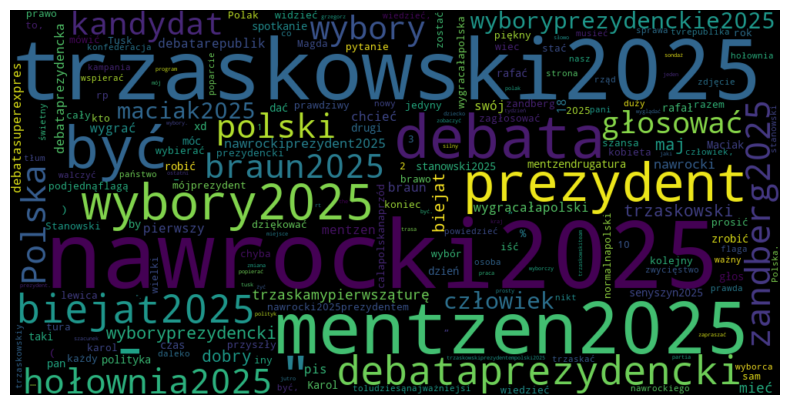

In [31]:
#wordcloud na tweetach zlematyzowanych oraz bez stopwords
tweets_base_no_stop = ' '.join(df['tweet_base_no_stop'].astype(str))
tweets_base_no_stop = tweets_base_no_stop.split()

cloud_base_no_stop = WordCloud(width=1000, height=500).generate_from_frequencies(Counter(tweets_base_no_stop))

plt.figure(dpi=100, figsize=(10,5))
plt.imshow(cloud_base_no_stop, interpolation='bilinear')
plt.axis('off')
plt.show()

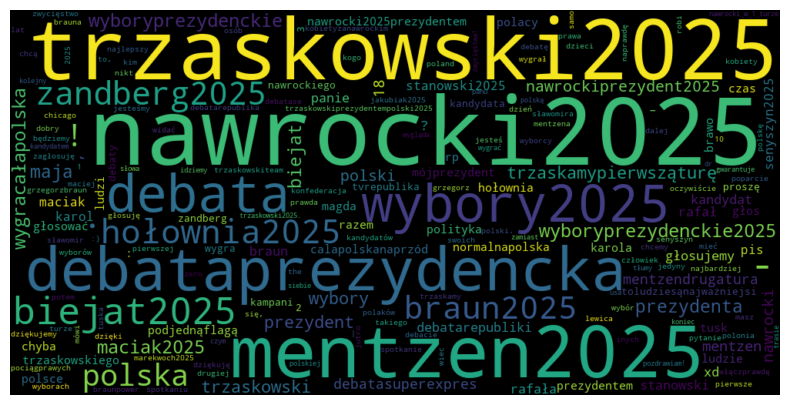

In [32]:
#wordcloud na tweetach bez stopwords
tweets_no_stop = ' '.join(df['tweet_no_stop'].astype(str))
tweets_no_stop = tweets_no_stop.split()

cloud_no_stop = WordCloud(width=1000, height=500).generate_from_frequencies(Counter(tweets_no_stop))

plt.figure(dpi=100, figsize=(10,5))
plt.imshow(cloud_no_stop, interpolation='bilinear')
plt.axis('off')
plt.show()

#zrobienie chmury słów na samych oczyszczonych tweetach nie ma sensu, ponieważ pokazuje  same stopwords.

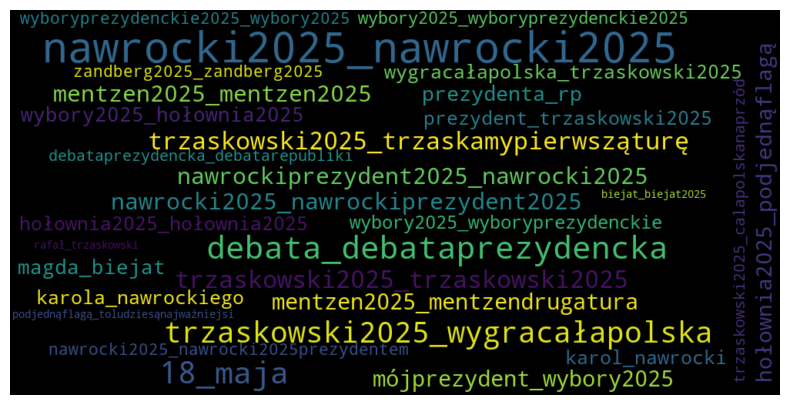

In [35]:
#wordcloud na 2-gram

tweets_2gram_cloud = ' '.join(df_2gram['2-gram'].astype(str))
tweets_2gram_cloud = tweets_2gram_cloud.split()


phrase_freq = Counter(tweets_2gram_cloud)
top30_2_gram = dict(phrase_freq.most_common(30))

#do chmury słow użyte jest tylko 30 najcześciej występujących 2-gramów, aby zachować czytelność wykresu
cloud_2_gram = WordCloud(width=1000, height=500).generate_from_frequencies(top30_2_gram)

plt.figure(dpi=100, figsize=(10, 5))
plt.imshow(cloud_2_gram, interpolation='bilinear')
plt.axis('off')
plt.show()


### Najczęsciej występujące słowa i n-gramy

In [59]:
#top 30 2-gram
df_top30_2_gram = pd.DataFrame(list(top30_2_gram.items()), columns = ['2-gram', 'count'])
df_top30_2_gram


,2-gram,count
0,nawrocki2025_nawrocki2025,358
1,debata_debataprezydencka,177
2,18_maja,166
3,trzaskowski2025_wygracałapolska,151
4,trzaskowski2025_trzaskamypierwsząturę,105
5,trzaskowski2025_trzaskowski2025,102
6,nawrocki2025_nawrockiprezydent2025,92
7,mentzen2025_mentzen2025,89
8,nawrockiprezydent2025_nawrocki2025,87
9,mentzen2025_mentzendrugatura,82


In [36]:
#top 30 slow
word_freq = Counter(tweets_base_no_stop)
top30_words = dict(word_freq.most_common(30))

df_top30_words = pd.DataFrame(list(top30_words.items()), columns = ['word', 'count'])
df_top30_words

,word,count
0,nawrocki2025,1663
1,trzaskowski2025,1313
2,mentzen2025,952
3,debata,609
4,-,599
5,być,577
6,prezydent,503
7,"""",456
8,wybory2025,446
9,debataprezydencki,441


### Dlugosc tweetow

In [93]:
# Liczenie długości tweetów w znakach (w oczyszczonych tweetach)
df['tweet_length_clean'] = df['tweet_clean'].astype(str).apply(lambda x: len(x.replace(" ", "")))

# średnia długość tweeta- po oczyszczeniu
len_avg_clean = df['tweet_length_clean'].mean()
print(len_avg_clean)

# Liczenie długości tweetów w znakach (w nieoczyszczonych tweetach)
df['tweet_length'] = df['tweet'].astype(str).apply(lambda x: len(x.replace(" ", "")))

# średnia długość tweeta- po oczyszczeniu
len_avg = df['tweet_length'].mean()
print(len_avg)

87.7877688172043
115.4513440860215


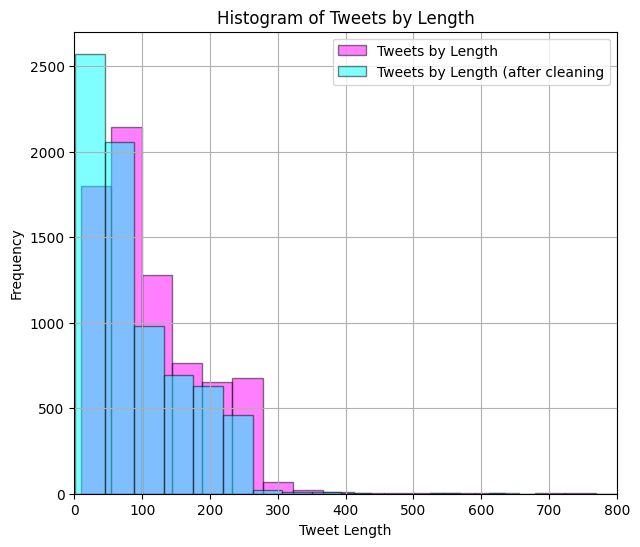

In [103]:
# histogram dlugosci tweetow

plt.figure(figsize=(7, 6))

n = len(df)
bins = int(np.ceil(2 * n**(1/3)))

plt.hist(df['tweet_length'], bins=bins, color='#FF00FF', edgecolor='black', label='Tweets by Length', alpha=0.5)
plt.hist(df['tweet_length_clean'], bins=bins, color='#00FFFF', edgecolor='black', label='Tweets by Length (after cleaning', alpha=0.5)


plt.title('Histogram of Tweets by Length')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.xlim(0, 800)
plt.legend()
plt.grid(True)
plt.show()